In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [13]:
data = pd.read_csv('data.csv',sep=';')

In [14]:
data.head()

,Class_id,Class_name,Vsl,Vsg,ID,Roughness,Ang,Density_L,Density_G,Visc_L,Visc_G,ST,P,T,model
0,3,SW,0.069922,0.198811,0.0549,0.0,0.0,792.567638,26.9,0.003218,0.000013,0.015,3252.7,57.5,3
1,3,SW,0.071208,0.544205,0.0549,0.0,0.0,791.440744,26.6,0.003218,0.000013,0.015,3244.6,62.1,3
2,4,AN,0.056396,0.994842,0.0549,0.0,0.0,791.648009,26.1,0.003218,0.000013,0.015,3257.5,62.9,3
3,4,AN,0.066180,1.657200,0.0549,0.0,0.0,791.260480,25.6,0.003218,0.000013,0.015,3258.2,58.2,3
4,4,AN,0.069075,3.564760,0.0549,0.0,0.0,791.433105,24.6,0.003218,0.000013,0.015,3284.1,59.4,4


In [15]:
data['Class_id'].unique()

array([3, 4, 5, 7, 2, 6, 8, 1], dtype=int64)

In [16]:
data['Class_name'].unique()

array(['SW', 'AN', 'IN', 'BL', 'SS', 'CH', 'MS', 'DB'], dtype=object)

In [17]:
print (data.head().to_latex())

\begin{tabular}{lrlrrrrrrrrrrllr}
\toprule
{} &  Class\_id & Class\_name &       Vsl &       Vsg &      ID &  Roughness &  Ang &   Density\_L &  Density\_G &    Visc\_L &    Visc\_G &     ST &       P &     T &  model \\
\midrule
0 &         3 &         SW &  0.069922 &  0.198811 &  0.0549 &        0.0 &  0.0 &  792.567638 &       26.9 &  0.003218 &  0.000013 &  0.015 &  3252.7 &  57.5 &      3 \\
1 &         3 &         SW &  0.071208 &  0.544205 &  0.0549 &        0.0 &  0.0 &  791.440744 &       26.6 &  0.003218 &  0.000013 &  0.015 &  3244.6 &  62.1 &      3 \\
2 &         4 &         AN &  0.056396 &  0.994842 &  0.0549 &        0.0 &  0.0 &  791.648009 &       26.1 &  0.003218 &  0.000013 &  0.015 &  3257.5 &  62.9 &      3 \\
3 &         4 &         AN &  0.066180 &  1.657200 &  0.0549 &        0.0 &  0.0 &  791.260480 &       25.6 &  0.003218 &  0.000013 &  0.015 &  3258.2 &  58.2 &      3 \\
4 &         4 &         AN &  0.069075 &  3.564760 &  0.0549 &        0.0 &  0.0 &  79

Text(0.5, 0, 'Angle ($\\theta$)')

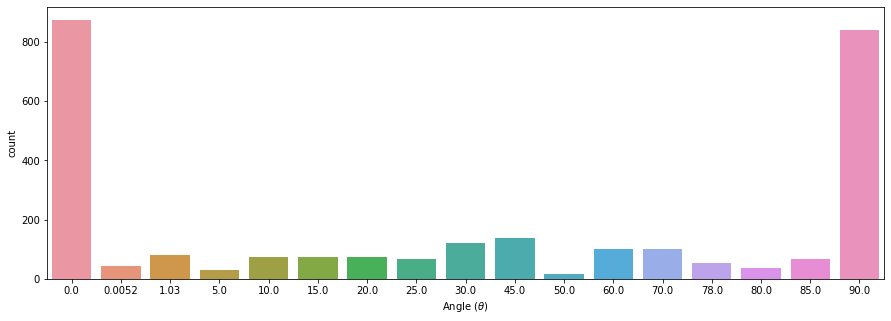

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Ang', data = data)
plt.xlabel(r'Angle ($\theta$)')

Text(0.5, 0, 'Internal Diameter ($m$)')

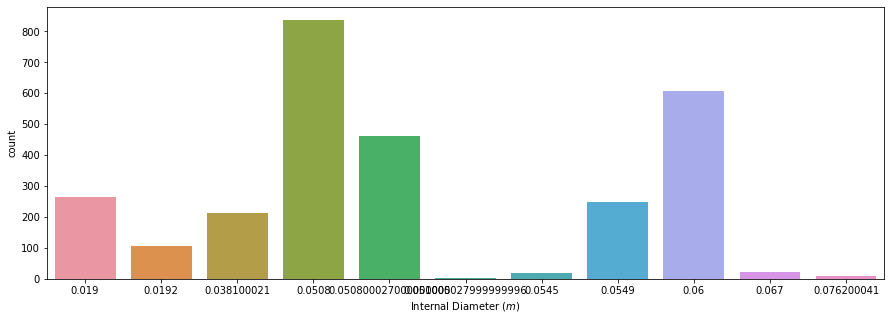

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'ID', data = data)
plt.xlabel(r'Internal Diameter ($m$)')

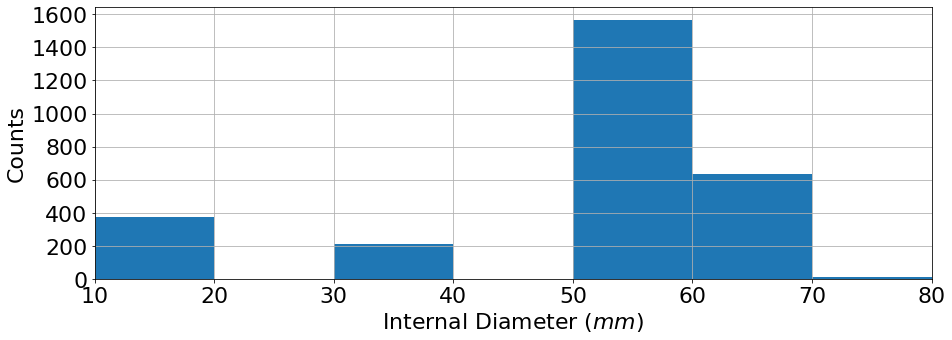

In [20]:
bins = np.linspace(data['ID'].values.min()*1000, data['ID'].values.max()*1000, 20)
bins =(10,20,30,40,50,60,70,80)
# Plot regular histograms
f=plt.figure(figsize=(15,5))
plt.hist(data['ID'].values*1000, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'Internal Diameter ($mm$)',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(10,80)
plt.grid()
plt.show()
#f.savefig("./fig/count_vs_ID.pdf", bbox_inches='tight')

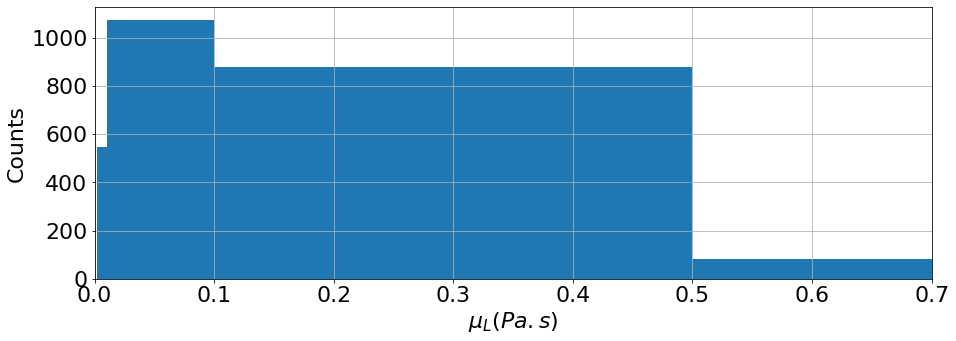

In [21]:
#bins = np.linspace(data['Visc_L'].values.min(), data['Visc_L'].values.max(), 20)
#x = np.linspace(0.019,0.08,19)
bins =(0.002,0.010,0.100,0.500,0.700)
#bins=bins/1000
# Plot regular histograms
f=plt.figure(figsize=(15,5))
plt.hist(data['Visc_L'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\mu_L(Pa.s$)',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0.0,0.7)
plt.grid()
#plt.legend(loc='upper right')
plt.show()
#f.savefig("./fig/count_vs_mul.pdf", bbox_inches='tight')

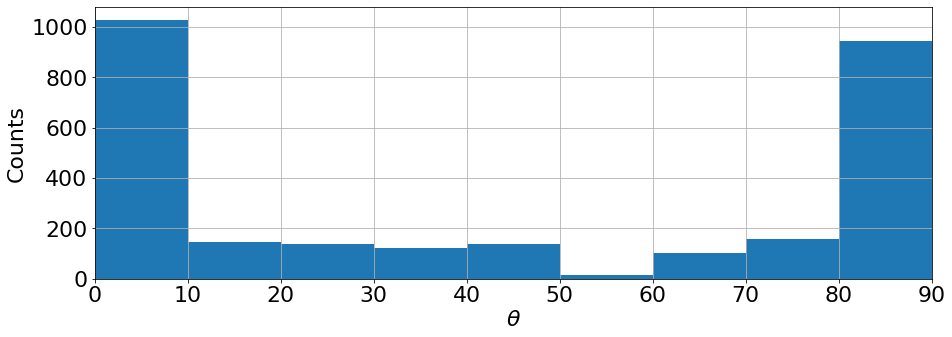

In [22]:
#bins = np.linspace(data['Density_L'].values.min(), data['Density_L'].values.max(), 20)
#x = np.linspace(0.019,0.08,19)
bins =(0,10,20,30,40,50,60,70,80,90)
f=plt.figure(figsize=(15,5))
plt.hist(data['Ang'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\theta$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,90)
#plt.legend(loc='upper right')
plt.grid()
plt.show()
#f.savefig("./fig/count_vs_angle.pdf", bbox_inches='tight')

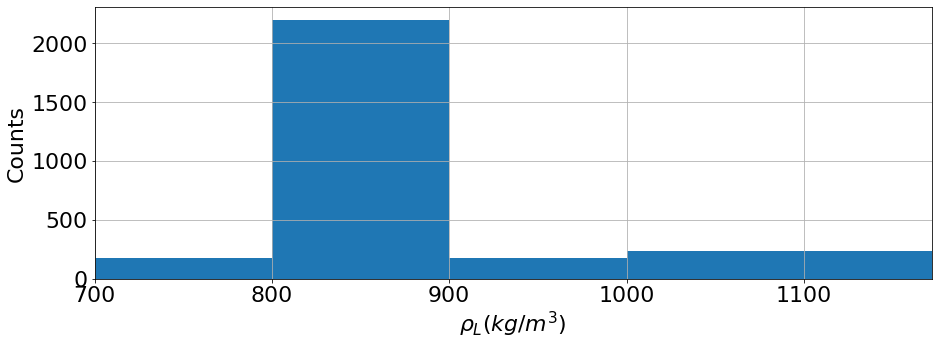

In [23]:
bins =(700,800,900,1000,data['Density_L'].values.max())
f=plt.figure(figsize=(15,5))
plt.hist(data['Density_L'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\rho_L(kg/m^3$)',fontsize=22)
plt.grid()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(700,data['Density_L'].values.max())
plt.show()
#f.savefig("./fig/count_vs_density.pdf", bbox_inches='tight')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


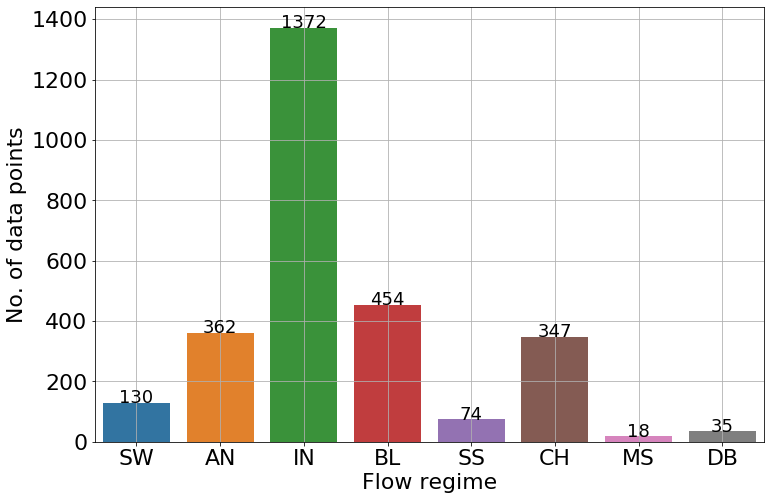

In [24]:
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['Stratified Smoth','Intermittent','Annular','Dispersed Bubble', 'Stratified Wavy','Bubble Flow','Churn','Mist'])
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'])

f=plt.figure(figsize = (12, 8))
ocean_plot = sns.countplot(x = 'Class_name', data = data)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points',fontsize=18)
plt.grid()
#plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Flow regime",fontsize=22)
plt.ylabel("No. of data points",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#f.savefig("./fig/data_distribution.pdf", bbox_inches='tight')

In [25]:
hannular = pd.read_csv('./fig_cartoon/horizontal/annular.txt',sep='\t').values
hbf = pd.read_csv('./fig_cartoon/horizontal/bf.txt',sep='\t').values
hdb = pd.read_csv('./fig_cartoon/horizontal/db.txt',sep='\t').values
hstratified = pd.read_csv('./fig_cartoon/horizontal/stratified.txt',sep='\t').values
hwavy = pd.read_csv('./fig_cartoon/horizontal/wavy.txt',sep='\t').values
vannular = pd.read_csv('./fig_cartoon/vertical/annular.txt',sep='\t').values
vbf = pd.read_csv('./fig_cartoon/vertical/bf.txt',sep='\t').values
vdb = pd.read_csv('./fig_cartoon/vertical/db.txt',sep='\t').values

In [26]:
vertical = data['Ang'] > 89
data1=data[vertical]
DB= data1.loc[data1['Class_name']=='DB']
SS= data1.loc[data1['Class_name']=='SS']
I= data1.loc[data1['Class_name']=='IN']
A= data1.loc[data1['Class_name']=='AN']
SW= data1.loc[data1['Class_name']=='SW']
B= data1.loc[data1['Class_name']=='BL']
C= data1.loc[data1['Class_name']=='CH']
M= data1.loc[data1['Class_name']=='MS']

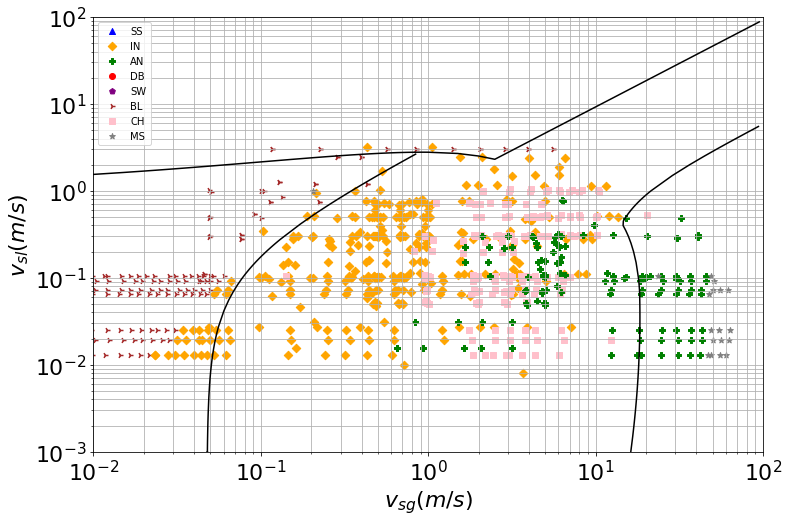

In [27]:
f=plt.figure(figsize = (12, 8))
b=plt.scatter(B['Vsg'],B['Vsl'],marker='4',color='brown')
i=plt.scatter(I['Vsg'],I['Vsl'],marker='D',color='orange')
c=plt.scatter(C['Vsg'],C['Vsl'],marker='s',color='pink')
a=plt.scatter(A['Vsg'],A['Vsl'],marker='P',color='green')
db=plt.scatter(DB['Vsg'],DB['Vsl'],marker='o',color='red')
m=plt.scatter(M['Vsg'],M['Vsl'],marker='*',color='grey')
ss=plt.scatter(SS['Vsg'],SS['Vsl'],marker='^',color='blue')
sw=plt.scatter(SW['Vsg'],SW['Vsl'],marker='p',color='purple')
plt.plot(vannular[:,0],vannular[:,1],color='black')
plt.plot(vbf[:,0],vbf[:,1],color='black')
plt.plot(vdb[:,0],vdb[:,1],color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.01,100,0.01,100])
plt.xticks([0.01, 0.1,1,10,100],fontsize=22)
plt.yticks([0.001, 0.01, 0.1,1,10,100],fontsize=22)
plt.grid(True, which="both")
plt.legend((ss,i,a,db,sw,b,c,m),('SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'))
plt.xlabel(r'$v_{sg}(m/s)$',fontsize=22)
plt.ylabel(r'$v_{sl}(m/s)$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()
#f.savefig("./fig/vsl_vs_vsg_vertical.pdf", bbox_inches='tight')

In [28]:
horizontaln = (data['Ang'] < 10.0)
horizontalp = (data['Ang'] > -10.0)
data1=data[horizontaln & horizontalp]
DB= data1.loc[data1['Class_name']=='DB']
SS= data1.loc[data1['Class_name']=='SS']
I= data1.loc[data1['Class_name']=='IN']
A= data1.loc[data1['Class_name']=='AN']
SW= data1.loc[data1['Class_name']=='SW']
B= data1.loc[data1['Class_name']=='BL']
C= data1.loc[data1['Class_name']=='CH']
M= data1.loc[data1['Class_name']=='MS']

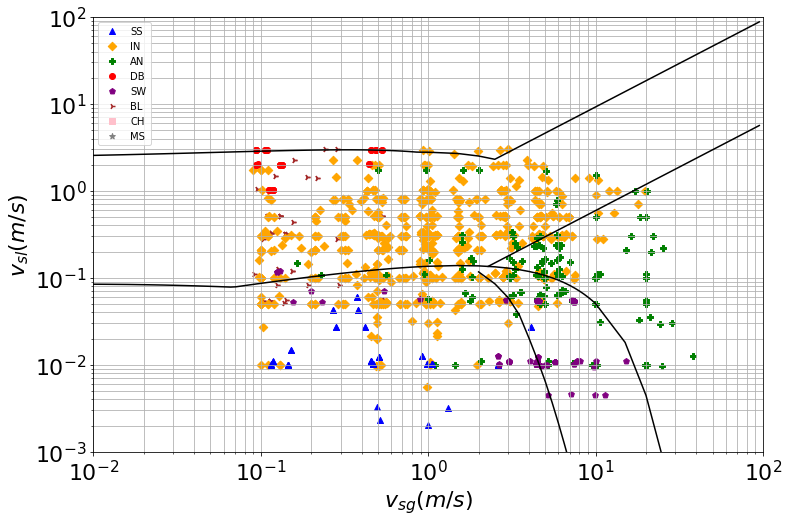

In [29]:
f=plt.figure(figsize = (12, 8))
b=plt.scatter(B['Vsg'],B['Vsl'],marker='4',color='brown')
i=plt.scatter(I['Vsg'],I['Vsl'],marker='D',color='orange')
c=plt.scatter(C['Vsg'],C['Vsl'],marker='s',color='pink')
a=plt.scatter(A['Vsg'],A['Vsl'],marker='P',color='green')
db=plt.scatter(DB['Vsg'],DB['Vsl'],marker='o',color='red')
m=plt.scatter(M['Vsg'],M['Vsl'],marker='*',color='grey')
ss=plt.scatter(SS['Vsg'],SS['Vsl'],marker='^',color='blue')
sw=plt.scatter(SW['Vsg'],SW['Vsl'],marker='p',color='purple')
plt.plot(hannular[:,0],hannular[:,1],color='black')
plt.plot(hbf[:,0],hbf[:,1],color='black')
plt.plot(hdb[:,0],hdb[:,1],color='black')
plt.plot(hstratified[:,0],hstratified[:,1],color='black')
plt.plot(hwavy[:,0],hwavy[:,1],color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.01,100,0.01,100])
plt.xticks([0.01, 0.1,1,10,100],fontsize=22)
plt.yticks([0.001, 0.01, 0.1,1,10,100],fontsize=22)
plt.grid(True, which="both")
plt.legend((ss,i,a,db,sw,b,c,m),('SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'))
plt.xlabel(r'$v_{sg}(m/s)$',fontsize=22)
plt.ylabel(r'$v_{sl}(m/s)$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()
#f.savefig("./fig/vsl_vs_vsg_horizontal.pdf", bbox_inches='tight')